<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/desarrollo/ODD_TP1_Boceto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports y carga del archivo

In [27]:
import pandas as pd
import matplotlib as plt

HOUSING_URL = "/content/drive/MyDrive/UBA /ODD/properati_argentina_2021.csv"
def load_housing_data(housing_url):
    return pd.read_csv(housing_url)

housing = load_housing_data(HOUSING_URL)

# Primera mirada a la data

In [3]:
housing.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [11]:
housing.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,0.0,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,NaN,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,NaN,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,NaN,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,NaN,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,NaN,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,NaN,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


array([[<Axes: title={'center': 'latitud'}>,
        <Axes: title={'center': 'longitud'}>,
        <Axes: title={'center': 'place_l6'}>],
       [<Axes: title={'center': 'property_rooms'}>,
        <Axes: title={'center': 'property_bedrooms'}>,
        <Axes: title={'center': 'property_surface_total'}>],
       [<Axes: title={'center': 'property_surface_covered'}>,
        <Axes: title={'center': 'property_price'}>, <Axes: >]],
      dtype=object)

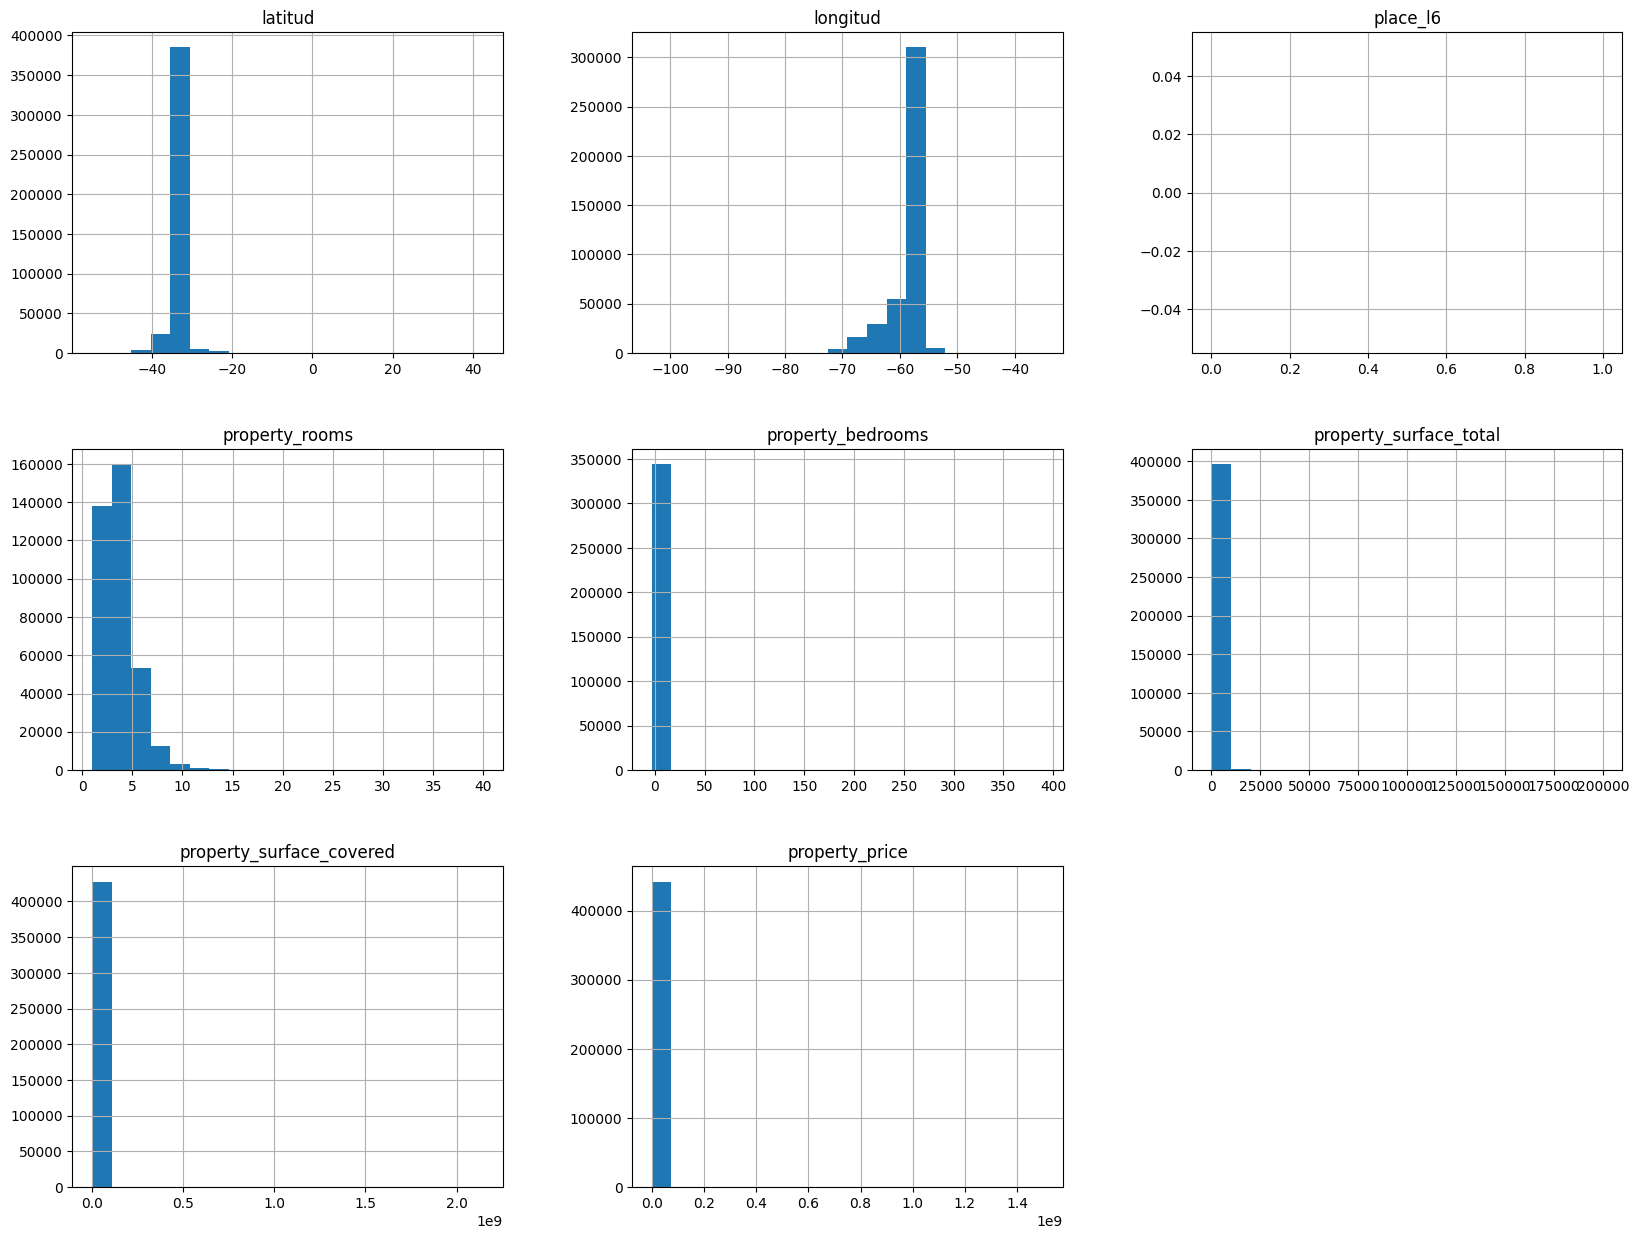

In [14]:
housing.hist(bins=20,figsize=(20,15))

# Secciones y descarte
#### Podemos ver como hay varios datos nulos, debemos analizar si son correctos

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

# CONTENIDO POR SECCIONES
- L2 = Provincia
- L3 = Ciudad
- L4 = Localidad
- L5 = Barrio privado
- L6 = NADA

In [15]:
housing["place_l2"].value_counts()

Series([], Name: place_l6, dtype: int64)

In [32]:
housing["place_l3"].value_counts()

Rosario              34735
Palermo              25811
Tigre                24327
La Plata             20230
Pilar                15648
                     ...  
Saladas                  1
El Chaltén               1
Paso del Sapo            1
Realicó                  1
Carlos Pellegrini        1
Name: place_l3, Length: 767, dtype: int64

In [31]:
housing["place_l4"].value_counts()

La Plata                       10253
Nordelta                        8637
Olivos                          3976
Ramos Mejía                     3413
Palermo Hollywood               2967
                               ...  
José C Paz                         1
Del Valle                          1
Barrio Cerrado "Las Marías"        1
Cachoeira do Bom Jesus             1
Juan José Paso                     1
Name: place_l4, Length: 791, dtype: int64

In [30]:
housing["place_l5"].value_counts()

BarrioPortezuelo                510
Barrio El Golf                  355
Barrio Los Alisos               314
Barrio Los Lagos                176
Barrio Los Sauces               162
Barrio Los Castores             122
Barrio La Alameda               105
Barrio Cabos del Lago            82
Barrio Lagos del Golf 2          82
Barrio Las Glorietas             77
Barrio Las Caletas               76
Barrio La Isla                   76
Barrio Los Tilos                 72
Islas del Canal                  41
Barrio El Yacht                  40
Barrio Barrancas del Lago        37
QBay Yacht                       31
Enyoi                            27
Barrio Lagos del Golf 1          23
Barrio Residencial Pacheco 2     22
Name: place_l5, dtype: int64

In [29]:
housing["place_l6"].value_counts()

Series([], Name: place_l6, dtype: int64)

In [34]:
housing2 = housing.drop( columns = ["place_l6"])
housing3 = housing2[ abs( housing2.latitud - housing2.latitud.mean() ) < housing2.latitud.std() ]
housing4 = housing3[ abs( housing3.longitud - housing3.longitud.mean() ) <  housing3.latitud.std() ]

housing4.describe()


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,277640.000000,277640.000000,234969.000000,214978.000000,244590.000000,2.634890e+05,2.729480e+05
mean,-34.581705,-58.512387,3.134490,2.246016,308.260779,9.141983e+02,2.352749e+05
std,0.191872,0.161002,1.710501,1.467598,2916.150833,2.192003e+05,3.693567e+06
min,-37.416865,-60.156774,1.000000,-2.000000,10.000000,1.000000e+00,0.000000e+00
25%,-34.622016,-58.563459,2.000000,1.000000,49.000000,4.500000e+01,5.000000e+04
50%,-34.590716,-58.464683,3.000000,2.000000,81.000000,7.300000e+01,1.100000e+05
75%,-34.543721,-58.411260,4.000000,3.000000,185.000000,1.560000e+02,2.120000e+05
max,-30.993503,-58.119315,40.000000,144.000000,200000.000000,1.111111e+08,1.500000e+09


In [35]:
housing4["place_l2"].value_counts()

Capital Federal                 149434
Bs.As. G.B.A. Zona Norte         72473
Bs.As. G.B.A. Zona Sur           26309
Bs.As. G.B.A. Zona Oeste         24718
Buenos Aires Interior             3541
Entre Ríos                         741
Colonia                            376
Santa Fe                            24
Montevideo                          11
Neuquén                              7
Buenos Aires Costa Atlántica         2
Santa Catarina                       1
Córdoba                              1
Salta                                1
California                           1
Name: place_l2, dtype: int64

MAPA

<ipython-input-36-a9cf50bb636d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housing4[housing.place_l2 == "Capital Federal"].plot(kind="scatter", x="longitud", y="latitud")


<Axes: xlabel='longitud', ylabel='latitud'>

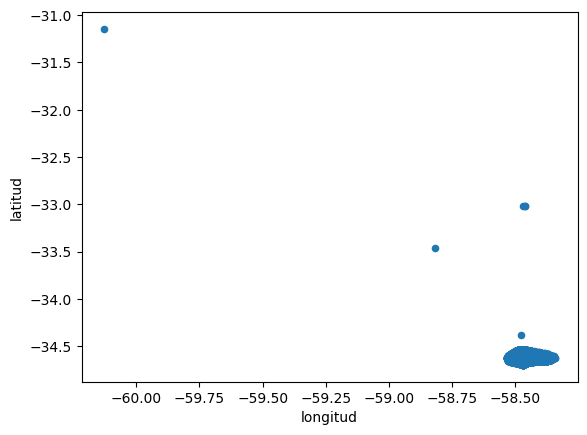

In [36]:
housing4[housing.place_l2 == "Capital Federal"].plot(kind="scatter", x="longitud", y="latitud")